In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import sem, ttest_ind
from matplotlib import pyplot as plt
%matplotlib notebook

from re import sub
from decimal import Decimal

In [3]:
company_df = pd.read_csv("company_data.csv")
company_df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [4]:
#Number of Top 500 S&P Companies in each Industry Sector

company_group = company_df.groupby("Sector").count()
company_group[["Symbol"]]

,Symbol
Sector,
Consumer Discretionary,84
Consumer Staples,34
Energy,32
Financials,68
Health Care,61
Industrials,67
Information Technology,70
Materials,25
Real Estate,33


In [46]:
#how many computer/math employees there are per state

math_emp = "BLS_math_employees.csv"
math_df = pd.read_csv(math_emp, encoding="utf-8")
math_df = math_df.sort_values("Mean_wage_yr", ascending=False)
math_df = math_df[["State", "Mean_wage_yr"]]
math_df.head()

,State,Mean_wage_yr
50,WA,108660
8,DC,108600
4,CA,108190
49,VA,102430
31,NJ,101390


<BarContainer object of 54 artists>

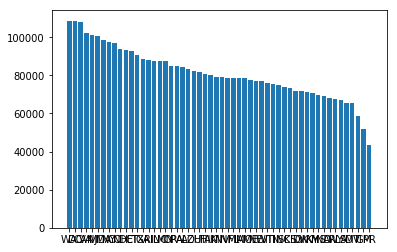

In [57]:
fig, ax = plt.subplots()
# x_axis = reformat_df.index

# fig.suptitle("Tumor Response to Treatment", fontsize=14, fontweight="bold")
# ax.set_xlabel("Number of Fortune 500 Companies per State")
# ax.set_ylabel("Average Wage of Computational Employees per State")

# ax.set_ylim(30,75)
# ax.grid()

ax.bar(math_df["State"], math_df["Mean_wage_yr"])
#make this more pretty pls

In [6]:
fortune_1000 = pd.read_csv("fortune_1000_part.csv")
revenue_int = []
for x in fortune_1000["Revenues ($M)"]:
    revenue_int.append(float(x.replace("$","").replace(",","").replace(" ","")))
fortune_1000["Revenue as Int"] = revenue_int
fortune_1000.loc[fortune_1000["State"] == "Michigan", "State"] = "MI"
fortune_1000

,Company,Revenues ($M),Profits ($M),Assets ($M),Employees,Sector,Industry,City,State,Revenue as Int
0,Walmart,"$500,343","$9,862.00","$204,522","2,300,000",Retailing,General Merchandisers,Bentonville,AR,500343.0
1,Exxon Mobil,"$244,363","$19,710.00","$348,691","71,200",Energy,Petroleum Refining,Irving,TX,244363.0
2,Berkshire Hathaway,"$242,137","$44,940.00","$702,095","377,000",Financials,Insurance: Property and Casualty (Stock),Omaha,NE,242137.0
3,Apple,"$229,234","$48,351.00","$375,319","123,000",Technology,"Computers, Office Equipment",Cupertino,CA,229234.0
4,UnitedHealth Group,"$201,159","$10,558.00","$139,058","260,000",Health Care,Health Care: Insurance and Managed Care,Minnetonka,MN,201159.0
5,McKesson,"$198,533","$5,070.00","$60,969","64,500",Wholesalers,Wholesalers: Health Care,SF,CA,198533.0
6,CVS Health,"$184,765","$6,622.00","$95,131","203,000",Health Care,Health Care: Pharmacy and Other Services,Woonsocket,RI,184765.0
7,Amazon.com,"$177,866","$3,033.00","$131,310","566,000",Retailing,Internet Services and Retailing,Seattle,WA,177866.0
8,AT&T,"$160,546","$29,450.00","$444,097","254,000",Telecommunications,Telecommunications,Dallas,TX,160546.0
9,General Motors,"$157,311","($3,864.00)","$212,482","180,000",Motor Vehicles & Parts,Motor Vehicles and Parts,Detroit,MI,157311.0


In [7]:
fortune_group = fortune_1000.groupby("State")
fortune_count = fortune_group["Revenue as Int"].count()
fortune_count.sort_values()

state_df = pd.DataFrame(fortune_count)
state_df = state_df.drop(["Puerto Rico"], axis=0)
state_df

,Revenue as Int
State,
AL,3
AR,8
AZ,17
CA,118
CO,19
CT,27
DE,2
FL,35
GA,30


In [8]:
fortune_mean = fortune_group["Revenue as Int"].mean()
mean_df = pd.DataFrame(fortune_mean)
mean_df


,Revenue as Int
State,
AL,4651.466667
AR,71746.875000
AZ,6149.411765
CA,14922.652542
CO,7440.315789
CT,13847.222222
DE,5681.000000
FL,9397.025714
GA,14390.233333


In [9]:
mean_df = mean_df.drop(["Puerto Rico"], axis=0)
mean_df

,Revenue as Int
State,
AL,4651.466667
AR,71746.875000
AZ,6149.411765
CA,14922.652542
CO,7440.315789
CT,13847.222222
DE,5681.000000
FL,9397.025714
GA,14390.233333


In [50]:
merged_df = pd.merge(state_df, math_df, on="State")
merged_df = merged_df.rename(columns={"Revenue as Int":"Number of F100 Company", "Mean_wage_yr":"Average Wage"})
merged_df["Region"] = ""
merged_df = merged_df.set_index("State")
merged_df

,Number of F100 Company,Average Wage,Region
State,,,
AL,3,84290,
AR,8,68290,
AZ,17,83140,
CA,118,108190,
CO,19,96880,
CT,27,92590,
DE,2,93550,
FL,35,78780,
GA,30,88590,


In [51]:
west = ["WA", "OR", "NV", "ID", "MT", "WY", "UT", "CO", "HI", "AL"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "MI", "IN", "OH"]
northeast = ["PA", "MD", "DE", "NJ", "CT", "RI", "MA", "NH", "VT", "ME"]
southeast = ["AR", "LA", "MS", "TN", "KY", "WV", "VA", "NC", "SC", "GA", "AL","FL"]
southwest = ["AZ","NM","OK"]

for index, row in merged_df.iterrows():
    if index in west:
        merged_df.loc[index,"Region"] = "West"
    elif index in midwest:
        merged_df.loc[index,"Region"] = "Midwest"
    elif index in northeast:
        merged_df.loc[index,"Region"] = "Northeast"
    elif index in southeast:
        merged_df.loc[index,"Region"] = "Southeast"
    elif index in southwest:
        merged_df.loc[index,"Region"] = "Southwest"
    elif index == "CA":
        merged_df.loc[index,"Region"] = "California"
    elif index == "TX":
        merged_df.loc[index,"Region"] = "Texas"
    elif index == "NY":
        merged_df.loc[index,"Region"] = "New York"

merged_df

,Number of F100 Company,Average Wage,Region
State,,,
AL,3,84290,West
AR,8,68290,Southeast
AZ,17,83140,Southwest
CA,118,108190,California
CO,19,96880,West
CT,27,92590,Northeast
DE,2,93550,Northeast
FL,35,78780,Southeast
GA,30,88590,Southeast


In [52]:
region_group = merged_df.groupby("Region")
region_average = region_group["Average Wage"].mean()
region_companies = region_group["Number of F100 Company"].sum()
region_df = pd.DataFrame(region_companies)
region_df["Average Wage"] = region_average
region_df

,Number of F100 Company,Average Wage
Region,,
California,118,108190.000000
Midwest,263,78690.909091
New York,93,97320.000000
Northeast,159,90658.000000
Southeast,178,78272.000000
Southwest,27,77340.000000
Texas,94,90740.000000
West,66,86018.750000


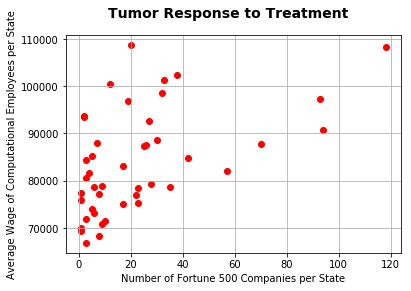

In [53]:
fig, ax = plt.subplots()
# x_axis = reformat_df.index

fig.suptitle("Tumor Response to Treatment", fontsize=14, fontweight="bold")
ax.set_xlabel("Number of Fortune 500 Companies per State")
ax.set_ylabel("Average Wage of Computational Employees per State")

# ax.set_ylim(30,75)
ax.grid()

ax.scatter(merged_df["Number of F100 Company"], merged_df["Average Wage"], marker="o", color = "r")
# (slope, intercept, _,_,_) = linregress(merged_df["Number of F100 Company"], merged_df["Average Revenue"])
# line = slope * merged_df["Number of F100 Company"] + intercept
# ax.plot(merged_df["Number of F100 Company"], line, "r--")
# capomulin, = ax.plot(x_axis, reformat_df["Capomulin"], "r--", marker="o",linewidth=1)

# plt.savefig("tumor_graph.png")

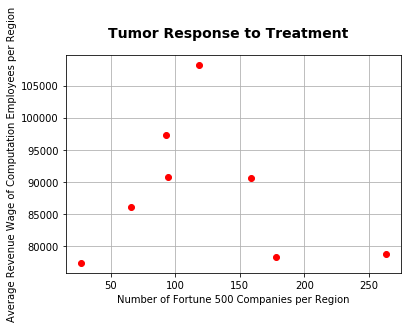

In [55]:
fig, ax = plt.subplots()
# x_axis = reformat_df.index

fig.suptitle("Tumor Response to Treatment", fontsize=14, fontweight="bold")
ax.set_xlabel("Number of Fortune 500 Companies per Region")
ax.set_ylabel("Average Revenue Wage of Computation Employees per Region")

# ax.set_ylim(30,75)
ax.grid()

ax.scatter(region_df["Number of F100 Company"], region_df["Average Wage"], marker="o", color = "r")
# (slope, intercept, _,_,_) = linregress(region_df["Number of F100 Company"], region_df["Average Revenue"])
# line = slope * region_df["Number of F100 Company"] + intercept
# ax.plot(region_df["Number of F100 Company"], line, "r--")
# capomulin, = ax.plot(x_axis, reformat_df["Capomulin"], "r--", marker="o",linewidth=1)

# plt.savefig("tumor_graph.png")

In [ ]:
#compare two regional areas with a p-test......